### Application of Linear Regression on various datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1) **Advertising Dataset**

In [2]:
df_ad = pd.read_csv('Datasets/Advertising.csv')
df_ad.head()

Month     TV  radio  newspaper  sales
0  Jan-00  230.1   37.8       69.2   22.1
1  Feb-00   44.5   39.3       45.1   10.4
2  Mar-00   17.2   45.9       69.3    9.3
3  Apr-00  151.5   41.3       58.5   18.5
4  May-00  180.8   10.8       58.4   12.9

## EDA

In [3]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      200 non-null    object 
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df_ad.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [5]:
df_ad.shape

(200, 5)

In [6]:
df_ad.isnull().sum()

Month        0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

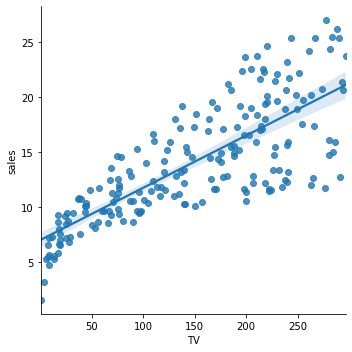

In [7]:
sns.lmplot(x='TV', y='sales', data=df_ad)

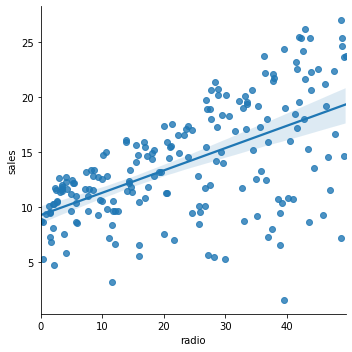

In [8]:
sns.lmplot(x='radio', y='sales', data=df_ad)

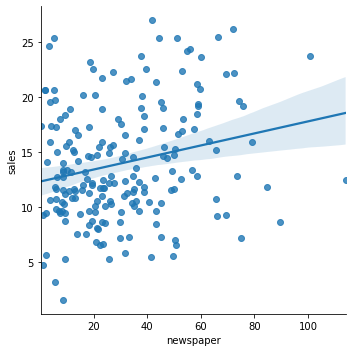

In [9]:
sns.lmplot(x='newspaper', y='sales', data=df_ad)

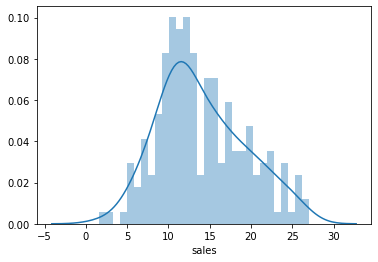

In [10]:
sns.distplot(df_ad['sales'], bins=30)

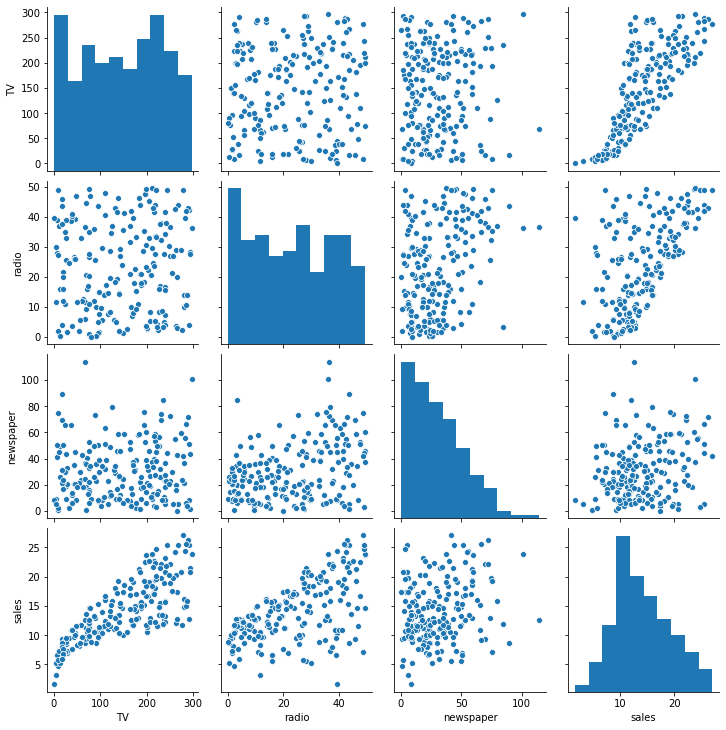

In [11]:
sns.pairplot(df_ad)

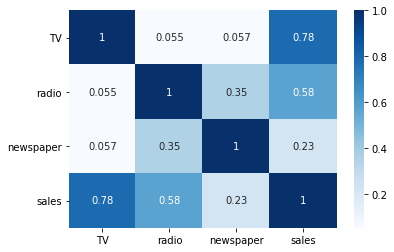

In [12]:
sns.heatmap(df_ad.corr(), annot=True, cmap='Blues')

**CONCLUSION:-**
- In this dataset, sales is the dependent variable, and as seen from the distplot, the variable follows a slightly right-skewed distribution.
- The dataset contains no missing values.
- According to the scatter plots of all the individual variables as well as the pairplot for the dataset, the variables 'TV' and 'radio' depict a positive correlation with the dependent variable, 'sales'. However, the variable 'newspaper' shows datapoints randomly scattered across the graph, and hence it can be concluded that it has little or no impact over sales.
- The heatmap indicates that the variable 'TV' has the highest impact on sales in this dataset.

## Building a Linear Regression Model

In [13]:
from sklearn.model_selection import train_test_split

x = df_ad[["radio","TV"]]
y = df_ad["sales"]

X_test,X_train,y_test,y_train = train_test_split(x,y,test_size=0.3,random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

**Scatter plot**

Text(0, 0.5, 'Predicted sales')

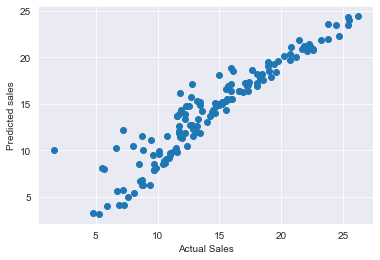

In [14]:
sns.set_style('darkgrid')
plt.scatter(y_test,predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted sales")

**Residual Histogram**

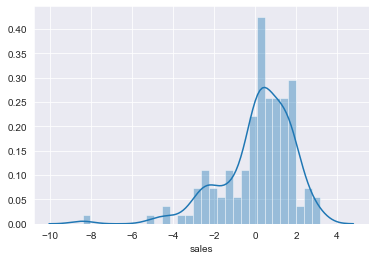

In [17]:
sns.distplot((y_test-predictions),bins=30)

## Calculating error metrics

In [18]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('R^2 Score:', round(metrics.r2_score(y_test, predictions)*100),"%")

Mean Absolute Error: 1.3173792072839843
Mean Squared Error: 3.0990719755918983
R^2 Score: 88.0 %


# 2) **Automobile Dataset**

In [19]:
df_auto = pd.read_csv('Datasets/Automobile_data.csv')
df_auto.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [20]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [21]:
df_auto.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2145.000000    97.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2935.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

In [22]:
df_auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [23]:
df_auto.shape

(205, 26)

In [24]:
df_auto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

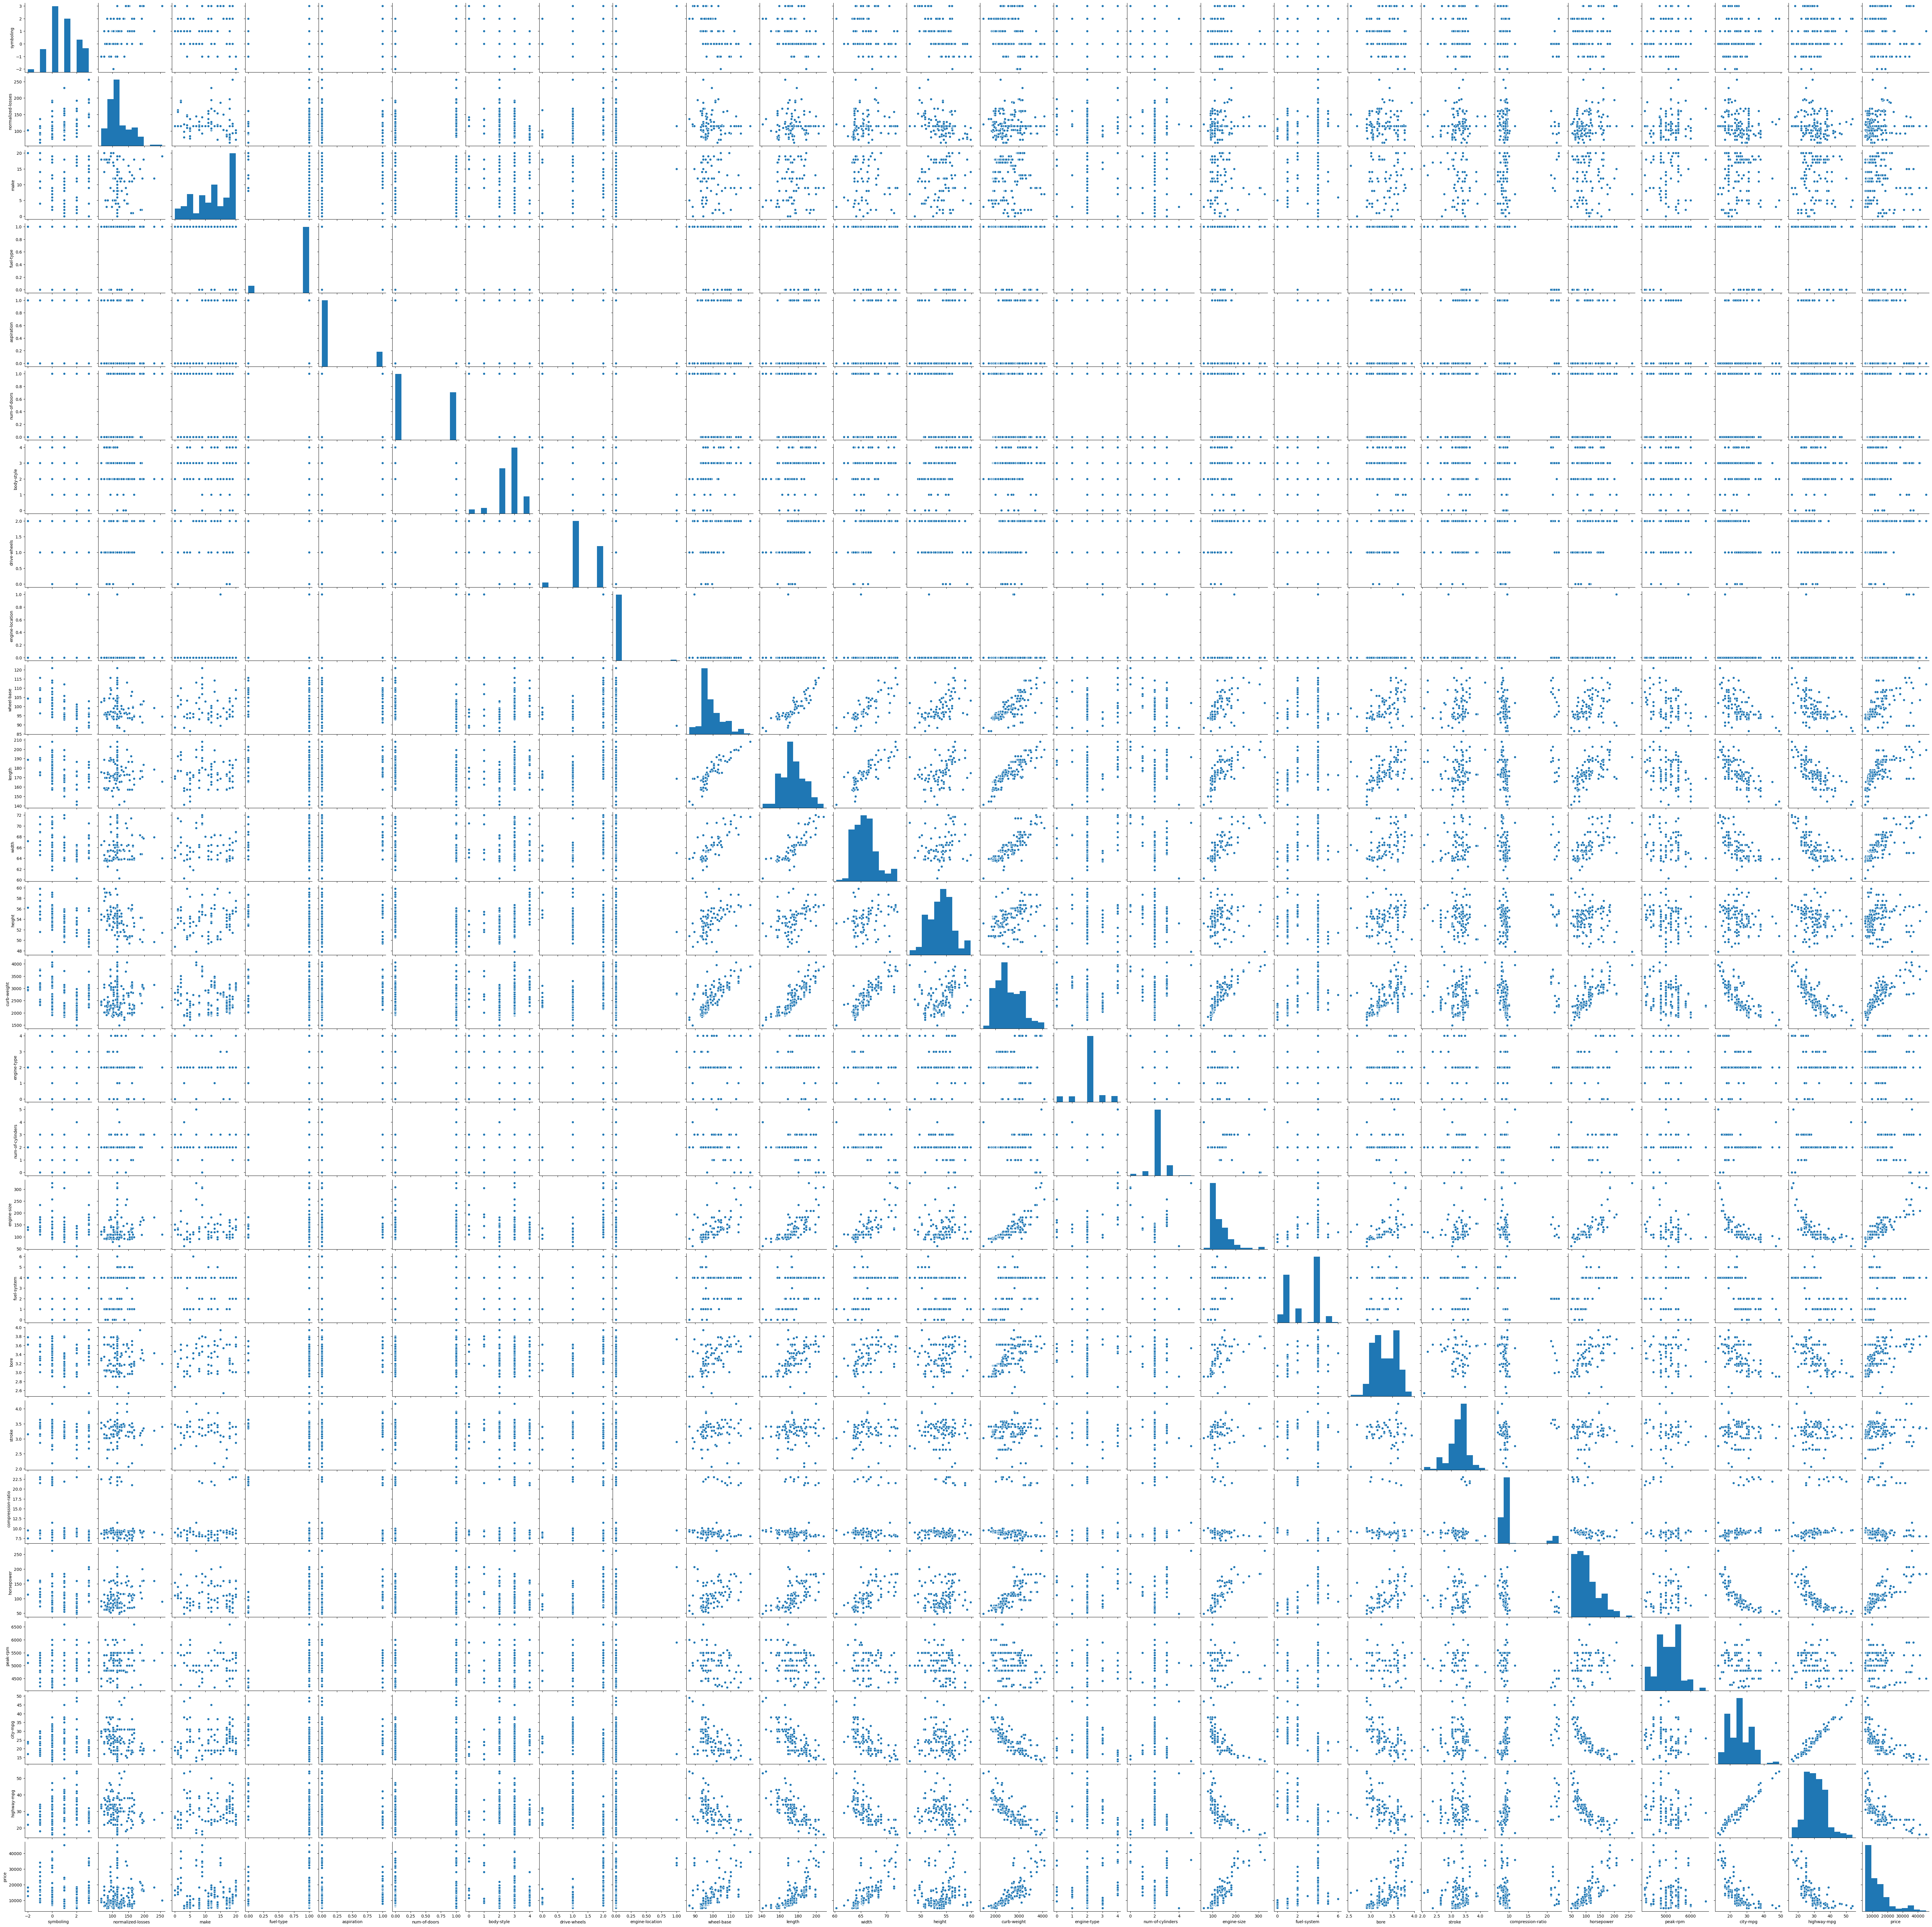

In [48]:
sns.pairplot(df_auto)

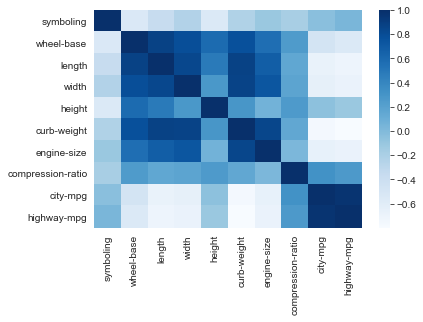

In [26]:
sns.heatmap(df_auto.corr(), cmap='Blues')

In [27]:
df_auto = df_auto.replace('?', np.nan)

In [28]:
df_auto.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [29]:
df_auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [32]:
# Imputing missing values in the 'normalized losses' variable, with the median=115

df_auto['normalized-losses'] = df_auto['normalized-losses'].apply(lambda x: 115.0 if pd.isnull(x) else x)

In [33]:
df_auto.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               115  alfa-romero       gas        std          two   
1          3               115  alfa-romero       gas        std          two   
2          1               115  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [35]:
# Dropping all the other NaN values

df_auto.dropna(inplace=True)

In [37]:
df_auto.shape

(193, 26)

In [38]:
# Converting dtype of object variables to numeric

df_auto['normalized-losses'] = pd.to_numeric(df_auto['normalized-losses'])
df_auto['price'] = pd.to_numeric(df_auto['price'])
df_auto['bore'] = pd.to_numeric(df_auto['bore'])
df_auto['stroke'] = pd.to_numeric(df_auto['stroke'])
df_auto['horsepower'] = pd.to_numeric(df_auto['horsepower'])
df_auto['peak-rpm'] = pd.to_numeric(df_auto['peak-rpm'])

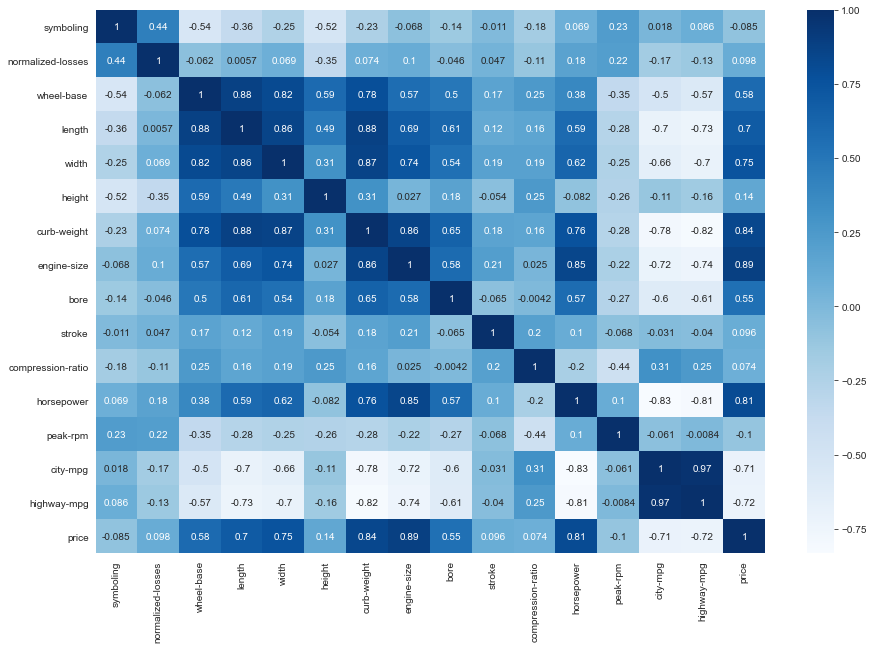

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df_auto.corr(),annot=True, cmap='Blues')

In [40]:
# Label Encoding for categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_auto["make"] = le.fit_transform(df_auto["make"])
df_auto["fuel-type"] = le.fit_transform(df_auto["fuel-type"])
df_auto["aspiration"] = le.fit_transform(df_auto["aspiration"])
df_auto["num-of-doors"] = le.fit_transform(df_auto["num-of-doors"])
df_auto["body-style"] = le.fit_transform(df_auto["body-style"])
df_auto["drive-wheels"] = le.fit_transform(df_auto["drive-wheels"])
df_auto["engine-location"] = le.fit_transform(df_auto["engine-location"])
df_auto["fuel-system"] = le.fit_transform(df_auto["fuel-system"])
df_auto["engine-type"] = le.fit_transform(df_auto["engine-type"])
df_auto["num-of-cylinders"] = le.fit_transform(df_auto["num-of-cylinders"])

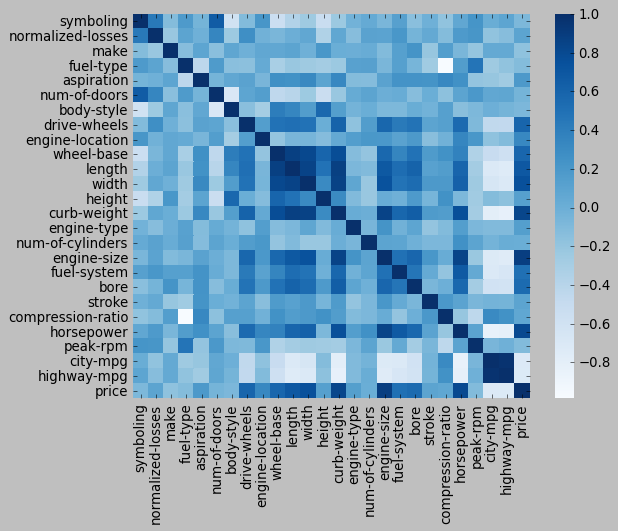

In [41]:
plt.style.use('classic')
sns.heatmap(df_auto.corr(), cmap='Blues')

**CONCLUSION:-**
- In this dataset, there were numerous missing values in multiple variables, which were imputed to represent an accurate correlation plot.
- Label encoding was used on all the categorical variables to convert them to numeric values, so that they're included in the heatmap and it is able to show a more conclusive report of the entire dataset.
- According to the heatmap, the variables with the highest impact on the dependent variable 'price' are: 'length','width','curb-weight', 'engine-size' and 'horsepower'. 
- The variables 'highway-mpg' and 'city-mpg' depict strong negative correlations with the target variable 'price' and thus, have little or no impact over it.

## Building a Linear Regression Model

In [42]:
x1 = df_auto[['length','width','curb-weight', 'engine-size', 'horsepower']]
y1 = df_auto["price"]

X1_test,X1_train,y1_test,y1_train = train_test_split(x1,y1,test_size=0.3,random_state=101)

from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()
lm1.fit(X1_train,y1_train)

pred = lm1.predict(X1_test)

**Scatter plot**

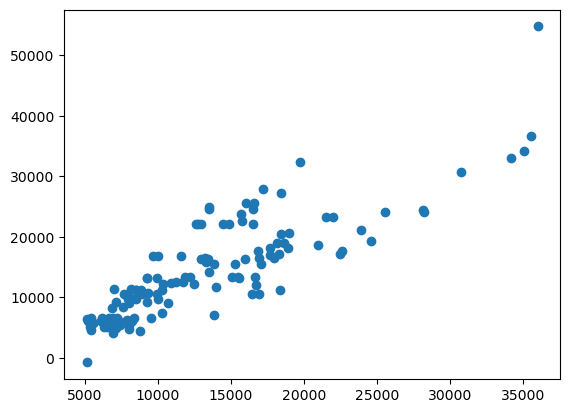

In [45]:
plt.style.use('default')
plt.scatter(y1_test,pred)

**Residual Histogram**

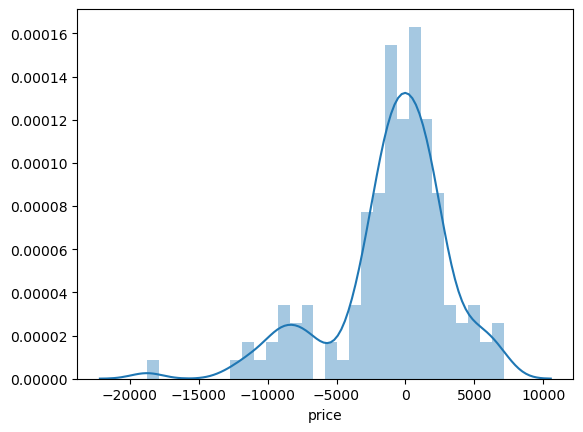

In [46]:
sns.distplot((y1_test-pred),bins=30)

## Calculating Error metrics

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, pred))
print('R^2 Score:', round(metrics.r2_score(y1_test, pred)*100),"%")

Mean Absolute Error: 2981.7524250069173
Mean Squared Error: 18729132.97868841
R^2 Score: 59.0 %


# 3) **Bank Marketing Dataset**

In [49]:
df_bank = pd.read_csv('Datasets/Bank_marketing.csv')
df_bank.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4          93.444          -36.1      4.963       5228.1  0  
1         -0.1          93.200          -42.0      4.021       5195.8  0  
2         -1.7          94.055          -39.8      0.729       4991.6  1  
3         -1.8          93.075          -47.1      1.405       5099.1  0  
4         -2.9          92.201          -31.4      0.869       5076.2  1  

[5 rows x 21 columns]

## **EDA**

In [50]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [51]:
df_bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr_employed             y  
count  41188.000000  41188.000000  
mean    5167.035911      0.112654  
std       72.251528      0.316173  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

In [52]:
df_bank.shape

(41188, 21)

In [53]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [54]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

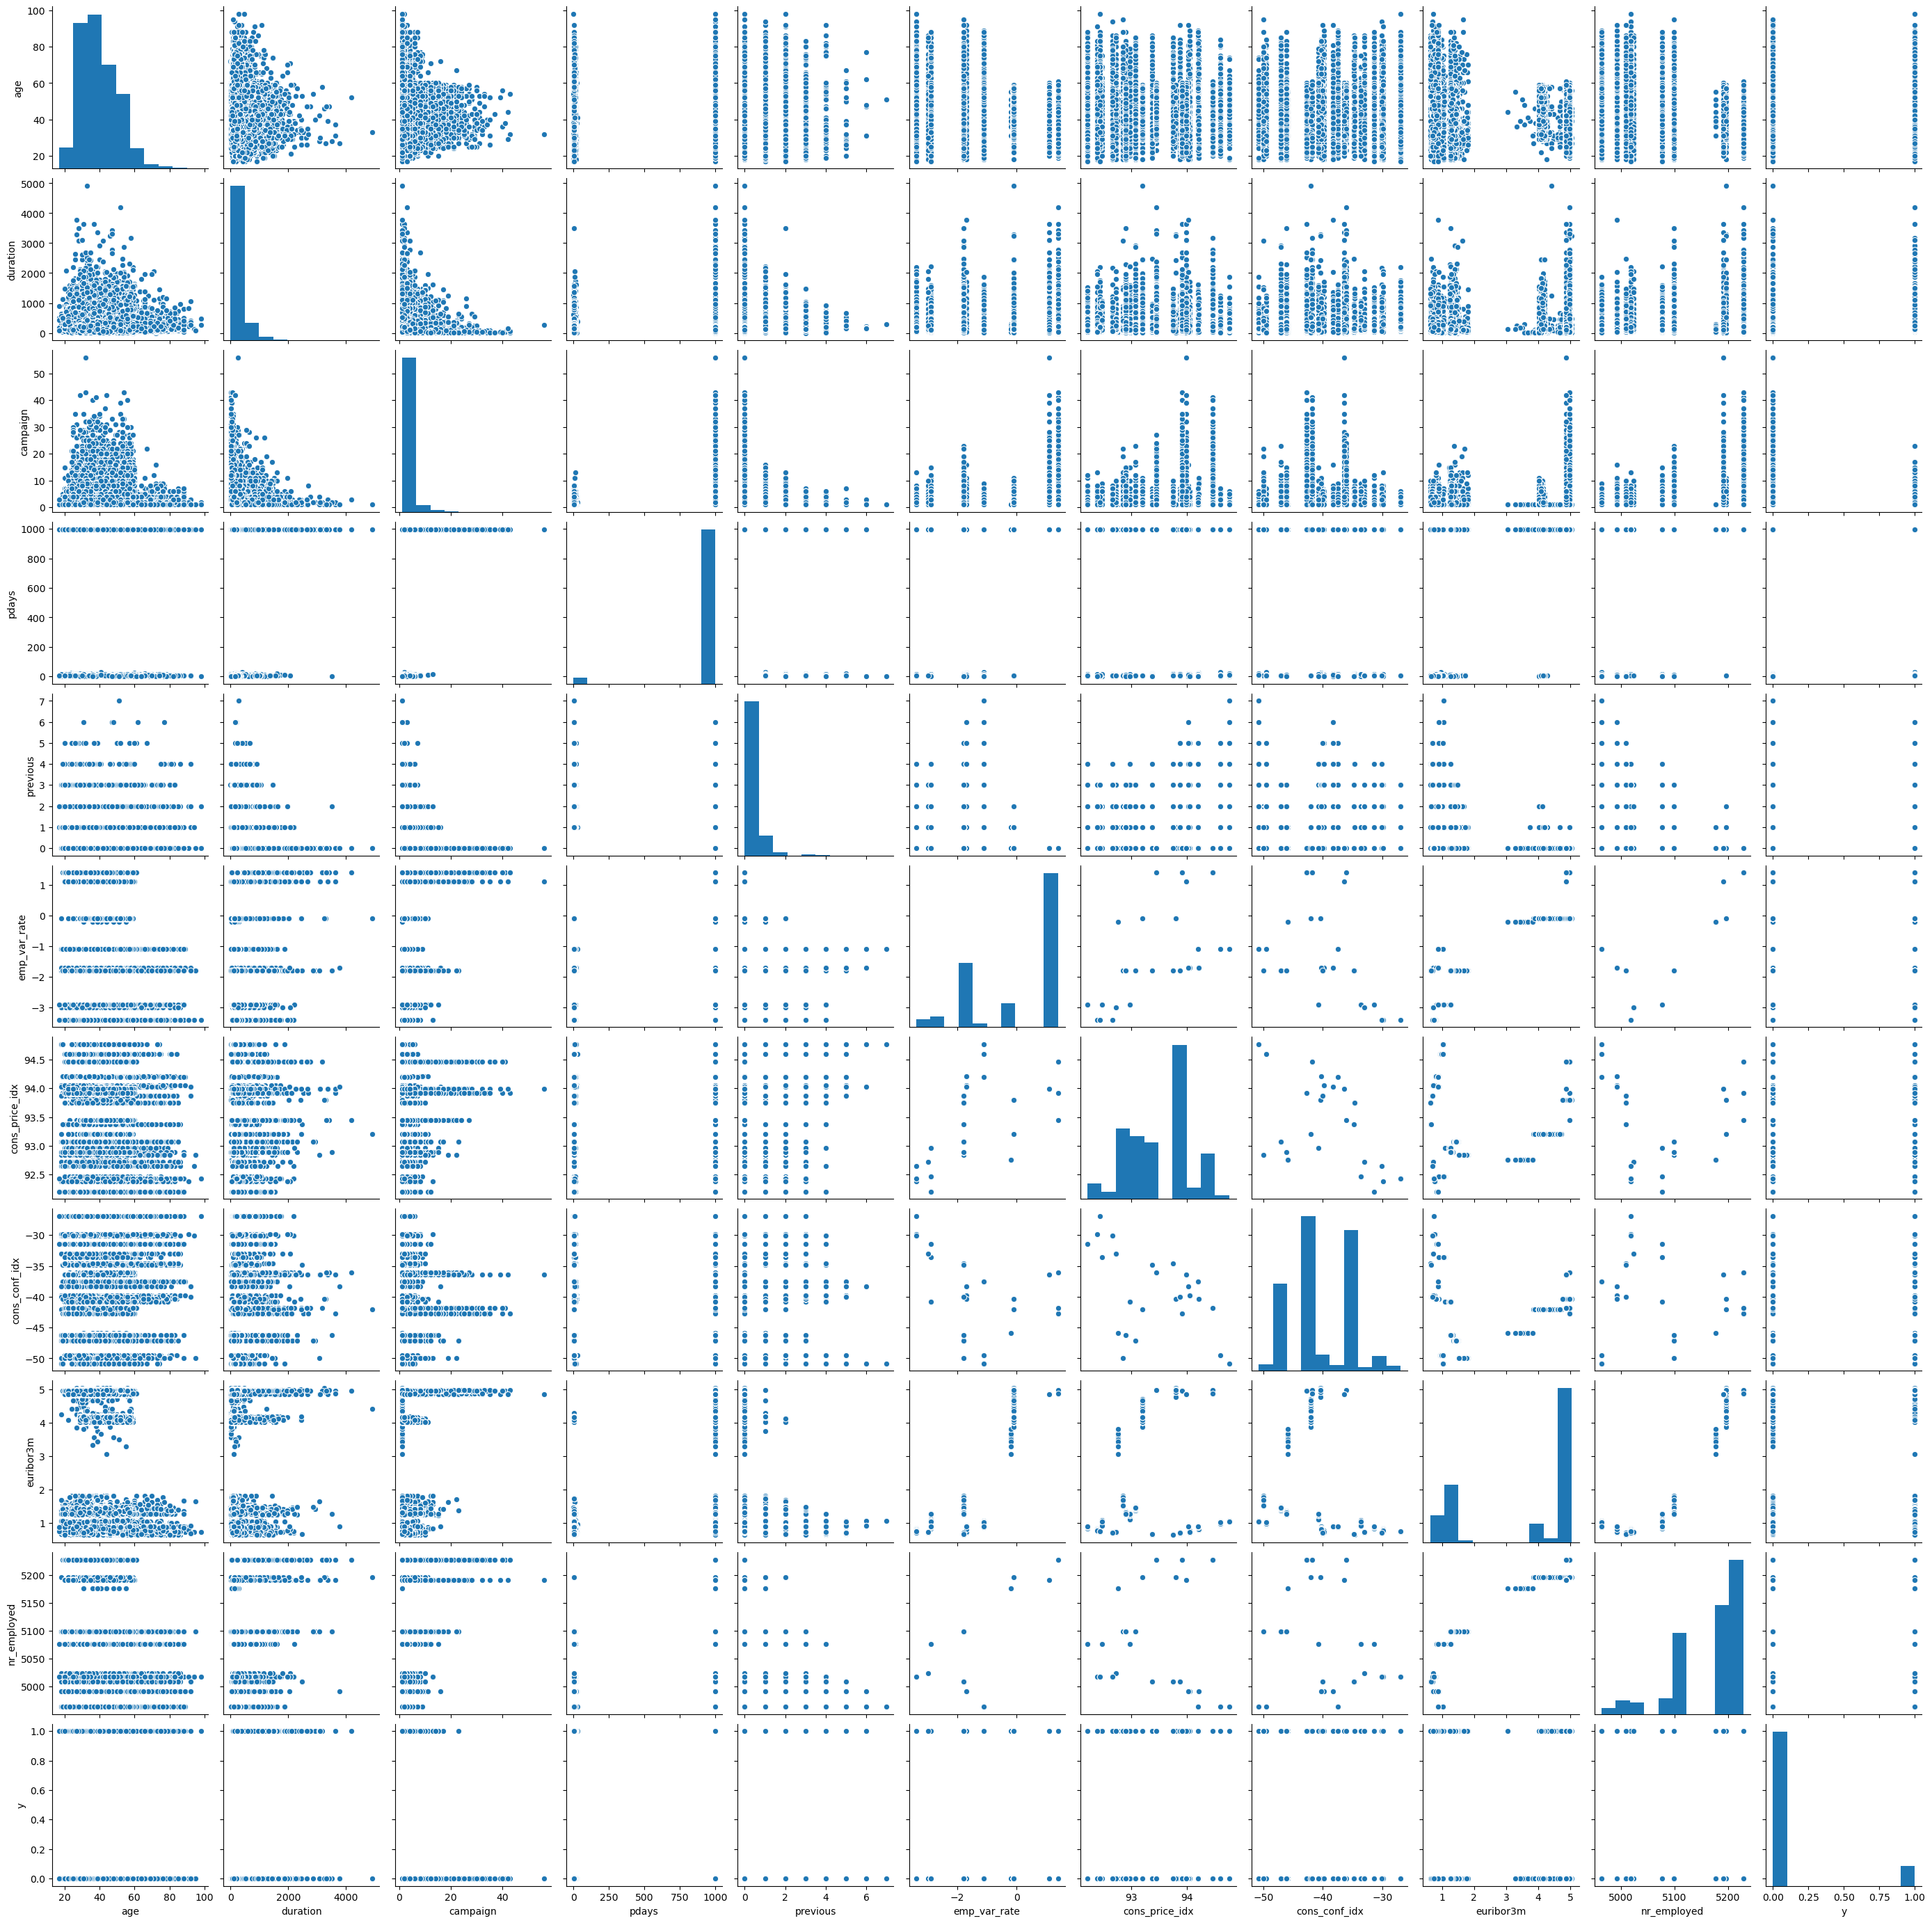

In [55]:
sns.pairplot(df_bank)

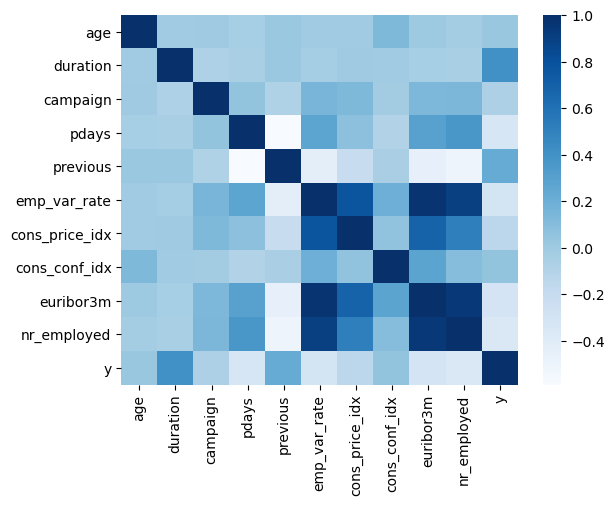

In [56]:
sns.heatmap(df_bank.corr(), cmap='Blues')

In [57]:
#feature encoding

dummy_cols = ['default', 'housing', 'loan', 'poutcome'] 
df_bank = pd.get_dummies(df_bank, columns=dummy_cols, drop_first=True)

In [58]:
df_bank.head()

age          job  marital          education   contact month day_of_week  \
0   44  blue-collar  married           basic.4y  cellular   aug         thu   
1   53   technician  married            unknown  cellular   nov         fri   
2   28   management   single  university.degree  cellular   jun         thu   
3   39     services  married        high.school  cellular   apr         fri   
4   55      retired  married           basic.4y  cellular   aug         fri   

   duration  campaign  pdays  ...  nr_employed  y  default_unknown  \
0       210         1    999  ...       5228.1  0                1   
1       138         1    999  ...       5195.8  0                0   
2       339         3      6  ...       4991.6  1                0   
3       185         2    999  ...       5099.1  0                0   
4       137         1      3  ...       5076.2  1                0   

   default_yes  housing_unknown  housing_yes  loan_unknown  loan_yes  \
0            0                0            1             0         0   
1            0                0            0             0         0   
2            0                0            1             0         0   
3            0                0            0             0         0   
4            0                0            1             0         0   

   poutcome_nonexistent  poutcome_success  
0                     1                 0  
1                     1                 0  
2                     0                 1  
3                     1                 0  
4                     0                 1  

[5 rows x 25 columns]

In [59]:
df_bank.drop(['default_unknown', 'housing_unknown', 'loan_unknown', 'poutcome_nonexistent'], inplace=True, axis=1)

In [60]:
df_bank.head()

age          job  marital          education   contact month day_of_week  \
0   44  blue-collar  married           basic.4y  cellular   aug         thu   
1   53   technician  married            unknown  cellular   nov         fri   
2   28   management   single  university.degree  cellular   jun         thu   
3   39     services  married        high.school  cellular   apr         fri   
4   55      retired  married           basic.4y  cellular   aug         fri   

   duration  campaign  pdays  ...  emp_var_rate  cons_price_idx  \
0       210         1    999  ...           1.4          93.444   
1       138         1    999  ...          -0.1          93.200   
2       339         3      6  ...          -1.7          94.055   
3       185         2    999  ...          -1.8          93.075   
4       137         1      3  ...          -2.9          92.201   

   cons_conf_idx  euribor3m  nr_employed  y  default_yes  housing_yes  \
0          -36.1      4.963       5228.1  0            0            1   
1          -42.0      4.021       5195.8  0            0            0   
2          -39.8      0.729       4991.6  1            0            1   
3          -47.1      1.405       5099.1  0            0            0   
4          -31.4      0.869       5076.2  1            0            1   

   loan_yes  poutcome_success  
0         0                 0  
1         0                 0  
2         0                 1  
3         0                 0  
4         0                 1  

[5 rows x 21 columns]

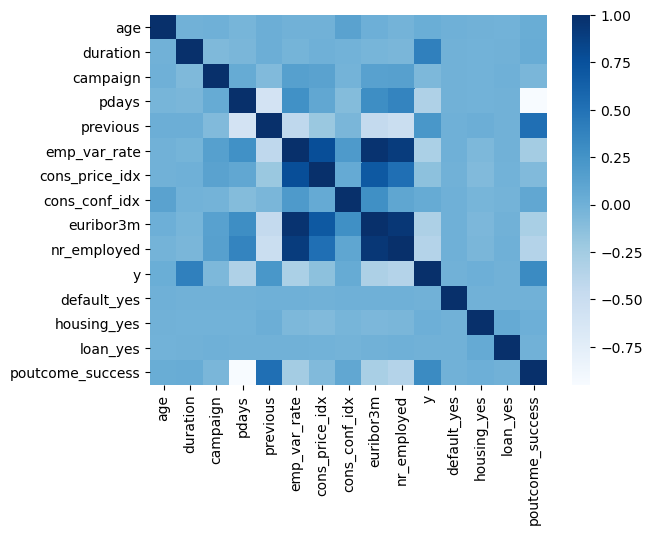

In [63]:
#plt.figure(figsize=(14,8))
sns.heatmap(df_bank.corr(), cmap='Blues')

**CONCLUSION:-**
- This is a classification problem as the variable to be predicted has yes/no categories. Therefore, regression cannot be carried out.
- Just by looking at the heatmap, the variable that has the highest impact on the target variable is 'duration'.